# Hepatitis Data Set

## Ομάδα Α29
## Φωτεινή Στρατή 03113001
## Κοσμάς Στεφανόπουλος 03113098

## 1. Εισαγωγή Dataset

To [Hepatitis Data Set ](http://archive.ics.uci.edu/ml/datasets/Hepatitis) περιλαμβάνει 155 δείγματα τόσο από γυναίκες όσο και από άντρες. Με βάση 19 χαρακτηριστικά προσπαθούμε να καταλάβουμε εάν ένας ασθενής θα ζήσει ή θα πεθάνει.

Στο dataset υπάρχουν ακέραιες και πραγματικές τιμές, ενώ τα κατηγορικά χαρακτηριστικά αναπαρίστανται με χρήση των ακεραίων αριθμών 1 ή 2.
Στο dataset δεν υπάρχουν επικεφαλίδες ούτε αρίθμηση των γραμμών.
Οι δύο κλάσσεις(ετικέτες) από τις οποίες αποτελείται το δείγμα συμβολίζονται κατά την περιγραφή του dataset με DIE ή LIVE, βρίσκονται στην πρώτη στήλη και αναπαρίστανται με 1 ή 2 στο .data αρχείο. 

Στη συνέχεια εισάγουμε το dataset στο notebook

In [208]:
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package

from io import StringIO
import requests
import json
import pandas as pd
import numpy


# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_32ec1f0398634e35bbfa6b37fec2e635(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_db257ebff076e5af1f80ab731e6fd39ee8564add','domain': {'id': 'e804d8bdc63a4706b779dbd2f16ecde3'},
            'password': 'GMljd7(Yq!eGC819'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

# Your data file was loaded into a StringIO object and you can process the data.
# Please read the documentation of pandas to learn more about your possibilities to load your data.
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html
data_1 = get_object_storage_file_with_credentials_32ec1f0398634e35bbfa6b37fec2e635('execise1', 'hepatitis.data')


Requirement already up-to-date: scikit-learn in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s653-bbdcd845a65a2b-8dae92f2c105/.local/lib/python2.7/site-packages
Requirement already up-to-date: numpy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s653-bbdcd845a65a2b-8dae92f2c105/.local/lib/python2.7/site-packages


Στη συνέχεια, βρίσκουμε σε ποια γνωρίσματα υπάρχουν απουσιάζουσες τιμές, το πλήθος και το ποσοστό των δειγμάτων που έχουν απουσιάζουσες τιμές, το πλήθος των κλάσεων και το ποσοστό της κάθε κλάσης επί του συνόλου:

In [209]:
dataset = pd.read_csv(data_1, header=None)
print("Missing Values of each feature: ")
print((dataset[range(1,20)] == '?').sum())
dataset[range(1,20)] = dataset[range(1,20)].replace('?', numpy.NaN)
mis = sum([True for idx,row in dataset.iterrows() if any(row.isnull())])
print("The amount of samples with missing values is: " + str(mis))
print("The percentage of samples with missing values is: {0:.0f}%".format(mis/155.0 * 100))
# Organize our data
labels_df = dataset.iloc[:, [0]]
features_df = dataset.iloc[:, 1:]
# μετατρέπουμε το dataframe σε numpy array
np_features = features_df.values
# μετατρέπουμε το dataframe σε μονοδιάστατο array
np_labels = labels_df.values.flatten()
print "frequencies:", numpy.bincount(np_labels)
print "percentage:", numpy.bincount(np_labels)*100.0/np_labels.shape

Missing Values of each feature: 
1      0
2      0
3      1
4      0
5      1
6      1
7      1
8     10
9     11
10     5
11     5
12     5
13     5
14     6
15    29
16     4
17    16
18    67
19     0
dtype: int64
The amount of samples with missing values is: 75
The percentage of samples with missing values is: 48%
frequencies: [  0  32 123]
percentage: [  0.          20.64516129  79.35483871]


To dataset είναι μη ισορροπημένο, γιατί η κλάση LIVE(2) είναι περίπου 4 φορές πιο συχνή από την κλάση DIE(1).

Στη συνέχεια, χωρίζουμε το dataset σε train set(80%) και test set(20%). Επειδή στο dataset υπάρχουν missing values και μάλιστα στο 48% των δειγμάτων, θα χρησιμοποιήσουμε το μετασχηματιστή “Imputer” του scikit learn που αντικαθιστά κάθε απουσιάζουσα τιμή χαρακτηριστικού με τη μέση τιμή του χαρακτηριστικού στο train set. Επίσης, επειδή το dataset είναι μη ισορροπημένο, θα κάνουμε ένα απλό random oversampling στο training set μας, με χρήση της imblearn. Το νέο training set θα χρησιμοποιηθεί στο 3ο μέρος της άσκησης.

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

# Replace missing values
imp=Imputer(missing_values='NaN', strategy='mean', axis=0)
values = dataset.values
transformed_values = imp.fit_transform(values)
# count the number of NaN values in each column
print(numpy.isnan(transformed_values).sum())

# Organize our data
labels_df = transformed_values[:,[0]]
features_df = transformed_values[:, 1:]
np_labels=labels_df.flatten()

#split dataset
train, test, train_labels, test_labels = train_test_split(features_df, np_labels, test_size=0.2,random_state=1)

#εξισορροπηση dataset: πειράζουμε μόνο το training set: στο 3ο μερος.
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer
# αρχικοποίηση του RandomOverSampler
ros = RandomOverSampler(random_state=0)
train_resampled, train_labels_resampled = ros.fit_sample(features_df,np_labels)

# εκτυπώνουμε τις νέες διαστάσεις του train set
print train_resampled.shape
print train_labels_resampled.shape

# επιβεβαιώνουμε ότι το training set έχει εξισορροπηθεί με oversampling
summ = train_labels_resampled.T.sum(axis=0)
print summ
uniqw, inverse = numpy.unique(train_labels_resampled, return_inverse=True)
uniqw
print "frequencies:", numpy.bincount(inverse)
print "percentage:", numpy.bincount(inverse)*100.0/train_labels_resampled.shape

0
(246, 19)
(246,)
369.0
frequencies: [123 123]
percentage: [ 50.  50.]


## 2. Baseline Classification 

Αρχικά, θα εκπαιδεύσουμε dummy classifiers και έναν MLP με default τιμές. Θα χρησιμοποιήσουμε το test set που έχουμε ορίσει, καθώς και τη μέθοδο 10-fold cross validation με 2 διαφορετικές μετρικές(f1-macro και f1-weigthed). Τα αποτελέσματα για τις μετρικές f1-macro και f1-weighted παρουσιάζονται και με τη μορφή διαγραμμάτων:

In [211]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

hep_predictions={}
hep_macro={}
hep_weighted={}

#dummy classifiers
from sklearn.dummy import DummyClassifier
dc_uniform = DummyClassifier(strategy="uniform",random_state=1)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1,random_state=1)
dc_constant_2 = DummyClassifier(strategy="constant", constant=2,random_state=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent",random_state=1)
dc_stratified = DummyClassifier(strategy="stratified",random_state=1)

#train and test dummy classifiers
model = dc_uniform.fit(train, train_labels)
hep_predictions['uniform']= dc_uniform.predict(test)
print("Uniform classifier ")
print(confusion_matrix(test_labels,hep_predictions['uniform']))
hep_macro['uniform']=precision_recall_fscore_support(test_labels,hep_predictions['uniform'],average='macro')
hep_weighted['uniform']=precision_recall_fscore_support(test_labels,hep_predictions['uniform'],average='weighted')
print classification_report(test_labels, hep_predictions['uniform'])

model = dc_constant_1.fit(train, train_labels)
hep_predictions['constant 1']=dc_constant_1.predict(test)
print("Constant_1 classifier ")
print(confusion_matrix(test_labels,hep_predictions['constant 1']))
hep_macro['constant 1']=precision_recall_fscore_support(test_labels,hep_predictions['constant 1'],average='macro')
hep_weighted['constant 1']=precision_recall_fscore_support(test_labels,hep_predictions['constant 1'],average='weighted')
print classification_report(test_labels, hep_predictions['constant 1'])


model = dc_constant_2.fit(train, train_labels)
hep_predictions['constant 2']=dc_constant_2.predict(test)
print("Constant_2 classifier ")
print(confusion_matrix(test_labels,hep_predictions['constant 2']))
hep_macro['constant 2']=precision_recall_fscore_support(test_labels,hep_predictions['constant 2'],average='macro')
hep_weighted['constant 2']=precision_recall_fscore_support(test_labels,hep_predictions['constant 2'],average='weighted')
print classification_report(test_labels, hep_predictions['constant 2'])


model = dc_most_frequent.fit(train, train_labels)
hep_predictions['most frequent label']=dc_most_frequent.predict(test)
print("Most Frequent Label Classifier ")
print(confusion_matrix(test_labels,hep_predictions['most frequent label']))
hep_macro['most frequent label']=precision_recall_fscore_support(test_labels,hep_predictions['most frequent label'],average='macro')
hep_weighted['most frequent label']=precision_recall_fscore_support(test_labels,hep_predictions['most frequent label'],average='weighted')
print classification_report(test_labels, hep_predictions['most frequent label'])


model = dc_stratified.fit(train, train_labels)
hep_predictions['stratified']=dc_stratified.predict(test)
print("Stratified ")
print(confusion_matrix(test_labels,hep_predictions['stratified']))
hep_macro['stratified']=precision_recall_fscore_support(test_labels,hep_predictions['stratified'],average='macro')
hep_weighted['stratified']=precision_recall_fscore_support(test_labels,hep_predictions['stratified'],average='weighted')
print classification_report(test_labels, hep_predictions['stratified'])


Uniform classifier 
[[ 3  2]
 [14 12]]
             precision    recall  f1-score   support

        1.0       0.18      0.60      0.27         5
        2.0       0.86      0.46      0.60        26

avg / total       0.75      0.48      0.55        31

Constant_1 classifier 
[[ 5  0]
 [26  0]]
             precision    recall  f1-score   support

        1.0       0.16      1.00      0.28         5
        2.0       0.00      0.00      0.00        26

avg / total       0.03      0.16      0.04        31

Constant_2 classifier 
[[ 0  5]
 [ 0 26]]
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         5
        2.0       0.84      1.00      0.91        26

avg / total       0.70      0.84      0.77        31

Most Frequent Label Classifier 
[[ 0  5]
 [ 0 26]]
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         5
        2.0       0.84      1.00      0.91        26

avg / total       0.

In [212]:
#mlp and cross validation

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier(random_state=1) #random_state=1
model = clf.fit(train, train_labels)
hep_predictions['mlp']=clf.predict(test)
print("MLP ")
print(confusion_matrix(test_labels,hep_predictions['mlp']))
print classification_report(test_labels, hep_predictions['mlp'])


hep_macro['mlp']=precision_recall_fscore_support(test_labels,hep_predictions['mlp'],average='macro')
hep_weighted['mlp']=precision_recall_fscore_support(test_labels,hep_predictions['mlp'],average='weighted')

MLP 
[[ 1  4]
 [ 0 26]]
             precision    recall  f1-score   support

        1.0       1.00      0.20      0.33         5
        2.0       0.87      1.00      0.93        26

avg / total       0.89      0.87      0.83        31




Results with f1-weighted average on the Hepatitis Dataset

constant 1: (0.026014568158168574, 0.16129032258064516, 0.044802867383512537, None)
uniform: (0.74735700731905663, 0.4838709677419355, 0.54721407624633434, None)
stratified: (0.67096774193548392, 0.64516129032258063, 0.65781151170145469, None)
constant 2: (0.70343392299687835, 0.83870967741935487, 0.76513865308432372, None)
most frequent label: (0.70343392299687835, 0.83870967741935487, 0.76513865308432372, None)
mlp: (0.8881720430107527, 0.87096774193548387, 0.83256528417818743, None)

Results with f1-macro average on the Hepatitis Dataset

constant 1: (0.080645161290322578, 0.5, 0.13888888888888887, None)
stratified: (0.40000000000000002, 0.38461538461538464, 0.39215686274509803, None)
uniform: (0.51680672268907557, 0.53076923076923077, 0.43636363636363634, None)
constant 2: (0.41935483870967744, 0.5, 0.45614035087719296, None)
most frequent label: (0.41935483870967744, 0.5, 0.45614035087719296, None)
mlp: (0.933333333333333

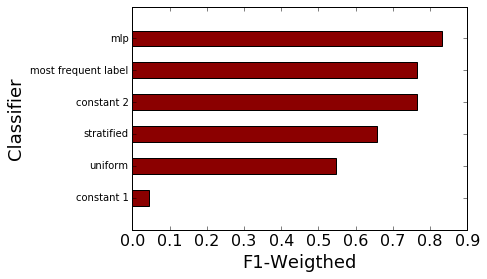

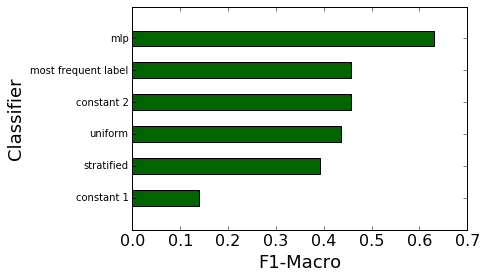

In [214]:
#print results
B=[]
S1=[]
print "\nResults with f1-weighted average on the Hepatitis Dataset\n"
for key, value in sorted(hep_weighted.iteritems(), key=lambda (k,v): (v[2],k)):
   print "%s: %s" % (key, value)
   B.append(value[2])
   S1.append(key)
    
C=[]
S2=[]
print "\nResults with f1-macro average on the Hepatitis Dataset\n"
for key, value in sorted(hep_macro.iteritems(), key=lambda (k,v): (v[2],k)):
   print "%s: %s" % (key, value)
   C.append(value[2])
   S2.append(key)
     
#plot f1-weighted
fig= plt.figure(facecolor="white")
ax = fig.add_subplot(1,1,1)
bar_width=0.5
bar_l = numpy.arange(1,7)
tick_pos = [i + (0.05 / 6) for i in bar_l]

ax1 = ax.barh(bar_l,B,height=bar_width,color='darkred',align='center')
ax.set_xlabel("F1-Weigthed", fontsize=18)
ax.set_ylabel("Classifier", fontsize=18)
ax.legend(loc="best")
plt.yticks(tick_pos,S1, fontsize=10)
plt.xticks(fontsize=16)
plt.show()

#plot f1-macro
fig= plt.figure(facecolor="white")
ax = fig.add_subplot(1,1,1)
bar_width=0.5
bar_l = numpy.arange(1,7)
tick_pos = [i + (0.05 / 6) for i in bar_l]

ax1 = ax.barh(bar_l,C,height=bar_width,color='darkgreen',align='center')
ax.set_xlabel("F1-Macro", fontsize=18)
ax.set_ylabel("Classifier", fontsize=18)
ax.legend(loc="best")
plt.yticks(tick_pos,S2, fontsize=10)
plt.xticks(fontsize=16)
plt.show()

Παρατηρούμε ότι το mlp έχει την καλύτερη απόδοση, τόσο στη μετρική F1-Weighted, όσο και στη μετρική F1-Macro. Οι most_frequent_label και constant_2, έχουν ακριβώς την ίδια απόδοση καθώς στο test set που ορίστηκε, υπάρχουν περισσότερα στοιχεία της κλασσης 2. Για αυτό το λόγο, το constant 1 έχει την χειρότερη απόδοση.

## 3. Βελτιστοποίηση Ταξινομητών

Σε αυτό το τμήμα της άσκησης, θα προσπαθήσουμε να βελτιώσουμε την απόδοσή των Classifiers στο training set μέσω της διαδικασίας
προεπεξεργασίας και εύρεσης βέλτιστων υπερπαραμέτρων. Όσον αφορά το κομμάτι της προπεξεργασίας, έχουμε ήδη δημιουργήσει δύο νέα σύνολα, το train_resampled και το train_label_resampled, με την τεχνική του oversampling. Συνεπώς, θα εκπαιδεύσουμε τους classifiers σε αυτά τα σύνολα. Σε αυτό το κομμάτι της άσκησης δε θα ασχοληθούμε με τους dummy classifiers, μόνο για τον Μlp.

Για τον Multilayer Perceptron, θα προβούμε στην αναζήτηση των βέλτιστων υπερπαραμέτρων με χρήση της τεχνικής 10-fold cross-validation.Πιο συγκεκριμένα, οι υπερπαράμετροι που θα αναζητήσουμε είναι: hidden_layer_sizes (θα χρησιμοποιήσουμε μόνο ένα επίπεδο κρυμμένων νευρώνων),
activation, solver, max_iter, learning_rate, alpha. Για τους καλύτερους συνδυασμούς υπερπαραμέτρων που θα προκύψουν, για τις μετρικές f1-macro και f1-weighted, θα εκπαιδεύσουμε τους αντίστοιχους mlp στο training set που έχει προκύψει από το oversampling, και θα τους αξιολογήσουμε με το test set.

Για το πεδίο activation, χρησιμοποιήσαμε τις τιμές: 'identity', 'logistic', 'tanh', 'relu' και είδαμε ότι τα καλύτερα scores επιτυγχάνονταν με τη μέθοδο 'relu'. Ομοίως στην περίπτωση του learning_rate δοκιμάσαμε τις μεθόδους: 'constant', 'invscaling', 'adaptive' και καταλήξαμε στην μέθοδο 'constant'. Επίσης, παρατηρήσαμε ότι η καλύτερη απόδοση επιτυγχάνεται όταν το hidden_layer_size παίρνει τιμές στο διάστημα [20,30]. Στη συνέχεια παρουσιάζουμε τη διαδικασία αναζήτησης βέλτιστων υπερπαραμέτρων για τον Mlp με βάση όσα αναφέραμε παραπάνω.

In [215]:
hep_predictions_opt={}
hep_macro_opt={}
hep_weighted_opt={}

kf = KFold(n_splits=10)
kf.get_n_splits(train_resampled)
macro_max=0
weighted_max=0

hidden_layer_sizes=[18,19,20,21,22,23,24,25,26,27,28]
activation=['relu']
solver=['lbfgs', 'sgd', 'adam']
max_iter=[200,250,300,350,400,450]
learning_rate=['constant']
alpha=[0.0001,0.001,0.01,0.1]

for n in hidden_layer_sizes:
    for act in activation:
        for s in solver:
            for i in max_iter:
                for l in learning_rate:
                    for a in alpha:
                        clf=MLPClassifier(solver=s, alpha=a ,hidden_layer_sizes=n, max_iter=i, activation=act, learning_rate=l)
                        cross_macro=cross_val_score(clf, train_resampled, train_labels_resampled, cv=kf, scoring='f1_weighted').mean() 
                        cross_weighted =cross_val_score(clf, train, train_labels, cv=kf, scoring='f1_macro').mean()
                        if cross_macro > macro_max:
                            macro_best=[s,a,n,i,act,l]
                            macro_max= cross_macro
                        if cross_weighted > weighted_max:
                            weighted_best=[s,a,n,i,act,l]
                            weighted_max = cross_weighted
        




Στη συνέχεια παρουσιάζουμε τις βέλτιστες υπερπαραμέτρους για τον mlp όπως προέκυψαν από την παραπάνω αναζήτηση, τόσο για τη μετρική f1-macro, όσο και για τη μετρική f1-weighted. Επίσης παρουσιάζουμε confusion matrix για τους classifiers που προκύπτουν από αυτά τα 2 σύνολα υπερπαραμέτρων, καθώς και τους χρόνους για Τraining και Τesting.

In [216]:
macro_best_small=macro_best
weighted_best_small=weighted_best

print("best macro parameters:")
print(macro_best)
print("best weighted parameters:")
print(weighted_best)

clf_macro=MLPClassifier(solver=macro_best[0], alpha=macro_best[1] ,hidden_layer_sizes=macro_best[2], max_iter=macro_best[3],activation=macro_best[4],learning_rate=macro_best[5])
clf_weighted=MLPClassifier(solver=weighted_best[0], alpha=weighted_best[1] ,hidden_layer_sizes=weighted_best[2], max_iter=weighted_best[3],activation=weighted_best[4],learning_rate=weighted_best[5])

import time
times={}
A=[]

time1=time.time()
model = clf_macro.fit(train_resampled, train_labels_resampled)
time2=time.time()
A.append(time2-time1)
time1=time.time()
hep_predictions_opt['mlp_macro']=clf_macro.predict(test)
time2=time.time()
A.append(time2-time1)
times['mlp_macro']=A

hep_macro_opt['mlp_macro']=precision_recall_fscore_support(test_labels,hep_predictions_opt['mlp_macro'],average='macro') 
hep_weighted_opt['mlp_macro']=precision_recall_fscore_support(test_labels,hep_predictions_opt['mlp_macro'],average='weighted')
print("\nMLP with best parameters for f1-macro")
print(confusion_matrix(test_labels,hep_predictions_opt['mlp_macro']))
print classification_report(test_labels, hep_predictions_opt['mlp_macro'])

   
A=[]
time1=time.time()
model = clf_weighted.fit(train_resampled, train_labels_resampled)
time2=time.time()
A.append(time2-time1)
time1=time.time()
hep_predictions_opt['mlp_weighted']=clf_weighted.predict(test)
time2=time.time()
A.append(time2-time1)
times['mlp_weighted']=A

hep_macro_opt['mlp_weighted']=precision_recall_fscore_support(test_labels,hep_predictions_opt['mlp_weighted'],average='macro')
hep_weighted_opt['mlp_weighted']=precision_recall_fscore_support(test_labels,hep_predictions_opt['mlp_weighted'],average='weighted')
print("\nMLP with best parameters for f1-weighted")
print(confusion_matrix(test_labels,hep_predictions_opt['mlp_weighted']))
print classification_report(test_labels, hep_predictions_opt['mlp_weighted'])


print "\nTraining and Testing times for the mpl classifiers with the best parameters\n"
for key, value in sorted(times.iteritems(), key=lambda (k,v): (v,k)):
   print "%s: %s" % (key, value)


best macro parameters:
['lbfgs', 0.001, 22, 450, 'relu', 'constant']
best weighted parameters:
['lbfgs', 0.001, 24, 250, 'relu', 'constant']

MLP with best parameters for f1-macro
[[ 5  0]
 [ 2 24]]
             precision    recall  f1-score   support

        1.0       0.71      1.00      0.83         5
        2.0       1.00      0.92      0.96        26

avg / total       0.95      0.94      0.94        31


MLP with best parameters for f1-weighted
[[ 3  2]
 [ 3 23]]
             precision    recall  f1-score   support

        1.0       0.50      0.60      0.55         5
        2.0       0.92      0.88      0.90        26

avg / total       0.85      0.84      0.84        31


Training and Testing times for the mpl classifiers with the best parameters

mlp_weighted: [0.10996294021606445, 0.00026798248291015625]
mlp_macro: [0.19660615921020508, 0.0002770423889160156]



10-fold cross validation results of MLP Classifier with f1-weighted average on the Hepatitis Dataset

mlp_weighted: (0.85225806451612907, 0.83870967741935487, 0.84445977804611583, None)
mlp_macro: (0.95391705069124433, 0.93548387096774188, 0.93956989247311828, None)

10-fold cross validation results of MLP Classifier with f1-macro average on the Hepatitis Dataset

mlp_weighted: (0.70999999999999996, 0.74230769230769234, 0.72370766488413552, None)
mlp_macro: (0.85714285714285721, 0.96153846153846156, 0.89666666666666672, None)


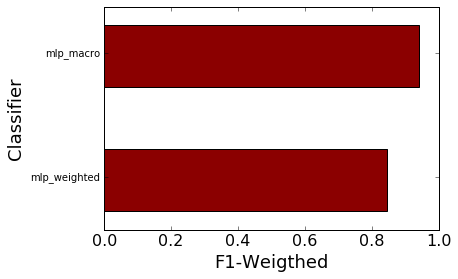

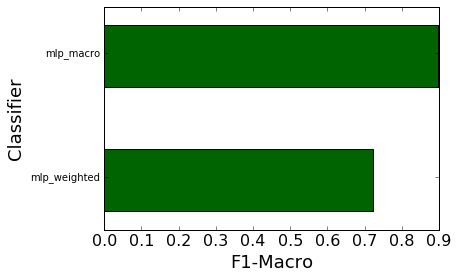

In [217]:
#print results
B=[]
S1=[]
print "\n10-fold cross validation results of MLP Classifier with f1-weighted average on the Hepatitis Dataset\n"
for key, value in sorted(hep_weighted_opt.iteritems(), key=lambda (k,v): (v[2],k)):
   print "%s: %s" % (key, value)
   B.append(value[2])
   S1.append(key)
    
C=[]
S2=[]
print "\n10-fold cross validation results of MLP Classifier with f1-macro average on the Hepatitis Dataset\n"
for key, value in sorted(hep_macro_opt.iteritems(), key=lambda (k,v): (v[2],k)):
   print "%s: %s" % (key, value)
   C.append(value[2])
   S2.append(key)
     
#plot f1-weighted
fig= plt.figure(facecolor="white")
ax = fig.add_subplot(1,1,1)
bar_width=0.5
bar_l = numpy.arange(1,3)
tick_pos = [i + (0.05 / 2) for i in bar_l]

ax1 = ax.barh(bar_l,B,height=bar_width,color='darkred',align='center')
ax.set_xlabel("F1-Weigthed", fontsize=18)
ax.set_ylabel("Classifier", fontsize=18)
ax.legend(loc="best")
plt.yticks(tick_pos,S1, fontsize=10)
plt.xticks(fontsize=16)
plt.show()

#plot f1-macro
fig= plt.figure(facecolor="white")
ax = fig.add_subplot(1,1,1)
bar_width=0.5
bar_l = numpy.arange(1,3)
tick_pos = [i + (0.05 / 2) for i in bar_l]

ax1 = ax.barh(bar_l,C,height=bar_width,color='darkgreen',align='center')
ax.set_xlabel("F1-Macro", fontsize=18)
ax.set_ylabel("Classifier", fontsize=18)
ax.legend(loc="best")
plt.yticks(tick_pos,S2, fontsize=10)
plt.xticks(fontsize=16)
plt.show()

Στη συνέχεια, παρουσιάζουμε τις μεταβολές στην επίδοση του MLP μετά την προεπεξεργασία της εισόδου και την αναζήτηση υπερπαραμέτρων. Παρατηρούμε ότι υπάρχει εμφανής βελτίωση.

In [218]:
hep_final_m={}
hep_final_w={}

S=[]
hep_macro['mlp_macro']=hep_macro['mlp_weighted']=hep_macro['mlp']
hep_weighted['mlp_macro']=hep_weighted['mlp_weighted']=hep_weighted['mlp']

for key, value in sorted(hep_macro_opt.iteritems(), key=lambda (k,v): (k,v)):
   A=[]
   S.append(key)
   B=hep_macro[key]
   A.append(B[2])
   A.append(value[2])
   A.append((value[2]-B[2])/B[2] * 100)
   hep_final_m[key]=A

for key, value in sorted(hep_weighted_opt.iteritems(), key=lambda (k,v): (k,v)):
   A=[]
   S.append(key)
   B=hep_weighted[key]
   A.append(B[2])
   A.append(value[2])
   A.append((value[2]-B[2])/B[2] * 100)
   hep_final_w[key]=A
    
L=['Method: ', ' F1-score_noOpt: ', ' F1-score_Opt: ', ' Diff: ']

print "Results before and after optimizations for the Classifiers on the f1-macro metric:\n"
for key, value in sorted(hep_final_m.iteritems(), key=lambda (k,v): (k,v)):
    A=value
    print(L[0] + key  + L[1] + str(A[0]) + L[2] + str(A[1]) + L[3] + str(A[2]) + "%")
    
print "\n\nResults before and after optimizations for the Classifiers on the f1-weigthed metric:\n"
for key, value in sorted(hep_final_w.iteritems(), key=lambda (k,v): (k,v)):
    A=value
    print(L[0] + key  + L[1] + str(A[0]) + L[2] + str(A[1]) + L[3] + str(A[2]) + "%")

Results before and after optimizations for the Classifiers on the f1-macro metric:

Method: mlp_macro F1-score_noOpt: 0.630952380952 F1-score_Opt: 0.896666666667 Diff: 42.1132075472%
Method: mlp_weighted F1-score_noOpt: 0.630952380952 F1-score_Opt: 0.723707664884 Diff: 14.7008374533%


Results before and after optimizations for the Classifiers on the f1-weigthed metric:

Method: mlp_macro F1-score_noOpt: 0.832565284178 F1-score_Opt: 0.939569892473 Diff: 12.852398524%
Method: mlp_weighted F1-score_noOpt: 0.832565284178 F1-score_Opt: 0.844459778046 Diff: 1.42865599779%
